# Исследование зарплат в сфере работы с большими данными по миру за 2020 - 2022 годы 

## Описание проекта
Для анализа выбран датасет "Data Science Job Salaries" с сайта www.kaggle.com. 
- Ссылка на исходный датасет - [Data Science Job Salaries](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)
- Данные актуальны на 2022 год
- В проекте проведен анализ портрета сотрудника, который зарабатывает больше всех/ меньше всех в сфере работы с большими данными по миру. 

## Цель анализа
Выяснить, от каких параметров зависит уровень заработной планы в сфере работы с большими данными. 


## Рамки исследования
В исследовании учитывается ряд условий/ ограничений:
1. В датасете 607 строк - для более масштабного исследования имеет смысл дождаться, когда наберется больше данных, чтобы более полно был представлен срез зарплат по отрасли. Либо нужно использовать дополнительные источники/ сайты для расширенного исследования. 
2. В исследовании сравниваются зарплаты по месяцам как для фулл-тайм специалистов, так и для парт-тайм. Одним из улучшений для будущих исследований может быть сравнение зарплаты в расчете на час рабочего времени, чтобы выяснить, кто получает больше в расчете на зарплату за час - фулл-тайм или парт-тайм сотрудник. 


## Описание данных
Файл ds_salaries.csv содержит информацию о зарплатах различных специалистов в сфере работы с большими данными по различным странам за 2020-2022 годы. Всегов файле 12 столбцов и 608 строк:
- столбец с порядковым номером записи
- work_year - год, в котором была выплачена зарплата
- experience_level - уровень опыта со следующими значениями:
  - EN - стажер/джуниор
  - MI - миддл
  - SE - сеньор
  - EX - лид/исполнительный директор
- employment_type - тип трудоустройства со следующими значениями:
  - PT - частичная занятость
  - FT - полная занятость
  - CT - контракт
  - FL - фриланс
- job_title - название должности
- salary - зарплата в валюте страны
- salary_currency - валюта зарплаты
- salary_in_usd - зарплата в долларах
- employee_residence - страна легального нахождения сотрудника
- remote_ratio - общее количество удаленной работы:
  - 0 - менее 20% удаленной работы
  - 50 - 50% удаленной работы (частичная удаленка)
  - 100 - более 80% удаленной работы (полная удаленка)
- company_location - страна, где находится головной офис компании, на которую работает сотрудник
- company_size - размер компании. Возможные значения:
  - S - менее 50 сотрудников (small)
  - M - 50-250 сотрудников (medium)
  - L - более 250 сотрудников (large)

## План исследования
1. Предобработка данных
- изучить типы данных
- изучить и обработать пропуски и дубликаты, если они есть
- изучить распределения в данных по зарплате

2. Исследовательский анализ данных. Найти ответы на вопросы:
  1. Сколько всего должностей каждой специализации
  2. Сколько грейдов каждого вида
  3. Сколько контрактов каждого типа (фриланс/ контракт / удаленная работа)
  4. Топ 10 стран с самым большим количеством сотрудников (страна компании и страна сотрудника)
  5. Топ 10 стран с самыми большими зарплатами (страна компании и страна сотрудника с учетом и без учета офисной/ полностью удаленной работы)
  6. Распределение по специализациям и грейдам по каждому году
  7. Распределение зарплат по каждому грейду и специализации
  8. Годовая динамика зарплат по каждому грейду и специализации
  9. Разница в зарплатах по каждой специализации в зависимости от грейдов
  10. Зависимость зарплаты от дополнительных параметров
  11. Тепловая карта портрета сотрудника с самой большой/ самой маленькой зарплатой

3. Выводы

## Предобработка данных

### Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from plotly import graph_objects as go
pd.options.display.float_format = '{:.2f}'.format

### Загрузим файл и изучим данные

In [2]:
ds_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ds_salaries.csv')

In [3]:
ds_data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
ds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


Загрузили 12 столбцов и 607 строк без учета строки с заголовками. 
Типы столбцов:
- целочисленные
- строковые

### Проверим на дубликаты

In [5]:
ds_data.duplicated().sum()

0

Явные дубликаты отсутствуют. При этом, в датасете будут присутствовать неявные дубликаты, т.к., например, в датасете есть строки с одинаковыми названиями уровня опыта, страны и т.д.
Обрабатывать такие дубликаты не нужно.  

### Просмотр уникальных значний по столбцам

In [6]:
ds_data['work_year'].sort_values(ascending = True).unique()

array([2020, 2021, 2022])

В датасете данные представлены за период 2020 - 2022 годы.

In [7]:
ds_data['experience_level'].sort_values(ascending = True).unique()

array(['EN', 'EX', 'MI', 'SE'], dtype=object)

В датасете представлены должности по следующим уровнем опыта
- EN - стажер/джуниор
- MI - миддл
- SE - сеньор
- EX - лид/исполнительный директор

Переименуем значения в данном столбце для удобства анализа:

In [8]:
def rename_experience_level(experience_level):
    try:
        if experience_level =='EN':
            return 'Junior'
        if experience_level =='MI':
            return 'Middle'
        if experience_level =='SE':
            return 'Senior'
        if experience_level =='EX':
            return 'Lead'
    except:
        pass

In [9]:
ds_data['experience_level_updated'] = ds_data['experience_level'].apply(rename_experience_level)

In [10]:
ds_data['experience_level_updated'].sort_values(ascending = True).unique()

array(['Junior', 'Lead', 'Middle', 'Senior'], dtype=object)

In [11]:
ds_data['employment_type'].sort_values(ascending = True).unique()

array(['CT', 'FL', 'FT', 'PT'], dtype=object)

В датасете представлены типы трудоустройства со следующими значениями:
- PT - частичная занятость
- FT - полная занятость
- CT - контракт
- FL - фриланс

Переименуем значения в данном столбце для удобства анализа:

In [12]:
def rename_employment_type(employment_type):
    try:
        if employment_type =='PT':
            return 'Part time'
        if employment_type =='FT':
            return 'Full time'
        if employment_type =='CT':
            return 'Contract'
        if employment_type =='FL':
            return 'Freelance'
    except:
        pass

In [13]:
ds_data['employment_type_update'] = ds_data['employment_type'].apply(rename_employment_type)

In [14]:
ds_data['employment_type_update'].sort_values(ascending = True).unique()

array(['Contract', 'Freelance', 'Full time', 'Part time'], dtype=object)

In [15]:
ds_data['job_title'].sort_values(ascending = True).unique()

array(['3D Computer Vision Researcher', 'AI Scientist',
       'Analytics Engineer', 'Applied Data Scientist',
       'Applied Machine Learning Scientist', 'BI Data Analyst',
       'Big Data Architect', 'Big Data Engineer', 'Business Data Analyst',
       'Cloud Data Engineer', 'Computer Vision Engineer',
       'Computer Vision Software Engineer', 'Data Analyst',
       'Data Analytics Engineer', 'Data Analytics Lead',
       'Data Analytics Manager', 'Data Architect', 'Data Engineer',
       'Data Engineering Manager', 'Data Science Consultant',
       'Data Science Engineer', 'Data Science Manager', 'Data Scientist',
       'Data Specialist', 'Director of Data Engineering',
       'Director of Data Science', 'ETL Developer',
       'Finance Data Analyst', 'Financial Data Analyst', 'Head of Data',
       'Head of Data Science', 'Head of Machine Learning',
       'Lead Data Analyst', 'Lead Data Engineer', 'Lead Data Scientist',
       'Lead Machine Learning Engineer', 'ML Engineer',


В датасете присутствуют различные названия должностей. Для удобства анализа сгруппируем должности по основным категориям: 

In [16]:
def group_job_title(title):
    try:
        if ('Analy' in title or 'Data' in title) and ('Engineer' not in title and 'Developer' not in title and 'Architect' not in title and 'Specialist' not in title and 'Scientist' not in title and 'Science' not in title and 'Machine Learning' not in title):
            return 'Data Analyst'
        if ('Science' in title or 'Scientist' in title or 'Researcher' in title or 'Machine Learning' in title) and ('Engineer' not in title and 'ETL' not in title and 'Analyst' not in title):
            return 'Machine Learning'
        if 'Engineer' in title or 'Developer' in title or 'Architect' in title or 'Specialist' in title or 'ETL' in title:
            return 'Data Engineering'
    except:
        return 'нужно определить дополнительную категорию'

In [17]:
ds_data['job_title_update'] = ds_data['job_title'].apply(group_job_title)

In [18]:
ds_data['job_title_update'].sort_values(ascending = True).unique()

array(['Data Analyst', 'Data Engineering', 'Machine Learning'],
      dtype=object)

In [19]:
ds_data['salary_currency'].sort_values(ascending = True).unique()

array(['AUD', 'BRL', 'CAD', 'CHF', 'CLP', 'CNY', 'DKK', 'EUR', 'GBP',
       'HUF', 'INR', 'JPY', 'MXN', 'PLN', 'SGD', 'TRY', 'USD'],
      dtype=object)

Приведем названия валюты к виду, который удобен для анализа:

In [20]:
def salary_currency_update(salary_currency):
    try:
        if salary_currency =='AUD':
            return 'Австралийский Доллар'
        if salary_currency =='BRL':
            return 'Бразильский Реал'
        if salary_currency =='CAD':
            return 'Канадский Доллар'
        if salary_currency =='CHF':
            return 'Швейцарский Франк'
        if salary_currency =='CLP':
            return 'Чилийский Песо'    
        if salary_currency =='CNY':
            return 'Китайский Юань' 
        if salary_currency =='DKK':
            return 'Датская Крона'
        if salary_currency =='EUR':
            return 'Евро (Страны Еврозоны)'
        if salary_currency =='GBP':
            return 'Фунт Стерлингов (Великобритания)'
        if salary_currency =='HUF':
            return 'Венгерский Форинт'
        if salary_currency =='INR':
            return 'Индийская Рупия'  
        if salary_currency =='JPY':
            return 'Японская Иена'
        if salary_currency =='MXN':
            return 'Мексиканский Песо'
        if salary_currency =='PLN':
            return 'Польский Злотый'
        if salary_currency =='SGD':
            return 'Сингапурский доллар'
        if salary_currency =='TRY':
            return 'Турецкая лира'
        if salary_currency =='USD':
            return 'Доллар США'  
    except:
        pass

In [21]:
ds_data['salary_currency_update'] = ds_data['salary_currency'].apply(salary_currency_update)

In [22]:
ds_data['salary_currency_update'].sort_values(ascending = True).unique()

array(['Австралийский Доллар', 'Бразильский Реал', 'Венгерский Форинт',
       'Датская Крона', 'Доллар США', 'Евро (Страны Еврозоны)',
       'Индийская Рупия', 'Канадский Доллар', 'Китайский Юань',
       'Мексиканский Песо', 'Польский Злотый', 'Сингапурский доллар',
       'Турецкая лира', 'Фунт Стерлингов (Великобритания)',
       'Чилийский Песо', 'Швейцарский Франк', 'Японская Иена'],
      dtype=object)

In [23]:
ds_data['employee_residence'].sort_values(ascending = True).unique()

array(['AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BO', 'BR', 'CA', 'CH', 'CL',
       'CN', 'CO', 'CZ', 'DE', 'DK', 'DZ', 'EE', 'ES', 'FR', 'GB', 'GR',
       'HK', 'HN', 'HR', 'HU', 'IE', 'IN', 'IQ', 'IR', 'IT', 'JE', 'JP',
       'KE', 'LU', 'MD', 'MT', 'MX', 'MY', 'NG', 'NL', 'NZ', 'PH', 'PK',
       'PL', 'PR', 'PT', 'RO', 'RS', 'RU', 'SG', 'SI', 'TN', 'TR', 'UA',
       'US', 'VN'], dtype=object)

Приведем названия страны сотрудника к виду, который удобен для анализа:

In [24]:
def employee_residence_update(employee_residence):
    try:
        if employee_residence =='AE':
            return 'ОАЭ'
        if employee_residence =='AR':
            return 'Аргентина'
        if employee_residence =='AT':
            return 'Австрия'
        if employee_residence =='AU':
            return 'Австралия'
        if employee_residence =='BE':
            return 'Бельгия'
        if employee_residence =='BG':
            return 'Болгария'
        if employee_residence =='BO':
            return 'Боливия'
        if employee_residence =='BR':
            return 'Бразилия'
        if employee_residence =='CA':
            return 'Канада'
        if employee_residence =='CH':
            return 'Швейцария'
        if employee_residence =='CL':
            return 'Чили'
        if employee_residence =='CN':
            return 'Китай'
        if employee_residence =='CO':
            return 'Колумбия'
        if employee_residence =='CZ':
            return 'Чехия'
        if employee_residence =='DE':
            return 'Германия'
        if employee_residence =='DK':
            return 'Дания'
        if employee_residence =='DZ':
            return 'Алжир'
        if employee_residence =='EE':
            return 'Эстония'
        if employee_residence =='ES':
            return 'Испания'
        if employee_residence =='FR':
            return 'Франция'
        if employee_residence =='GB':
            return 'Великобритания'
        if employee_residence =='GR':
            return 'Греция'
        if employee_residence =='HK':
            return 'Гонконг'
        if employee_residence =='HN':
            return 'Гондурас'
        if employee_residence =='HR':
            return 'Хорватия'
        if employee_residence =='HU':
            return 'Венгрия'
        if employee_residence =='IE':
            return 'Ирландия'
        if employee_residence =='IN':
            return 'Индия'
        if employee_residence =='IQ':
            return 'Ирак'
        if employee_residence =='IR':
            return 'Иран'
        if employee_residence =='IT':
            return 'Италия'
        if employee_residence =='JE':
            return 'Джерси'
        if employee_residence =='JP':
            return 'Япония'
        if employee_residence =='KE':
            return 'Кения'
        if employee_residence =='LU':
            return 'Люксембург'
        if employee_residence =='MD':
            return 'Молдова'
        if employee_residence =='MT':
            return 'Мальта'
        if employee_residence =='MX':
            return 'Мексика'
        if employee_residence =='MY':
            return 'Малайзия'
        if employee_residence =='NG':
            return 'Нигерия'
        if employee_residence =='NL':
            return 'Нидерланды'
        if employee_residence =='NZ':
            return 'Новая Зеландия'
        if employee_residence =='PH':
            return 'Филиппины'
        if employee_residence =='PK':
            return 'Пакистан'
        if employee_residence =='PL':
            return 'Польша'
        if employee_residence =='PR':
            return 'Пуэрто-Рико'
        if employee_residence =='PT':
            return 'Португалия'
        if employee_residence =='RO':
            return 'Румыния'
        if employee_residence =='RS':
            return 'Сербия'
        if employee_residence =='RU':
            return 'Россия'
        if employee_residence =='SG':
            return 'Сингапур'
        if employee_residence =='SI':
            return 'Словения'
        if employee_residence =='TN':
            return 'Тунис'
        if employee_residence =='TR':
            return 'Турция'
        if employee_residence =='UA':
            return 'Украина'
        if employee_residence =='US':
            return 'США'
        if employee_residence =='VN':
            return 'Вьетнам'
    except:
        pass

In [25]:
ds_data['employee_residence_update'] = ds_data['employee_residence'].apply(employee_residence_update)

In [26]:
ds_data['employee_residence_update'].sort_values(ascending = True).unique()

array(['Австралия', 'Австрия', 'Алжир', 'Аргентина', 'Бельгия',
       'Болгария', 'Боливия', 'Бразилия', 'Великобритания', 'Венгрия',
       'Вьетнам', 'Германия', 'Гондурас', 'Гонконг', 'Греция', 'Дания',
       'Джерси', 'Индия', 'Ирак', 'Иран', 'Ирландия', 'Испания', 'Италия',
       'Канада', 'Кения', 'Китай', 'Колумбия', 'Люксембург', 'Малайзия',
       'Мальта', 'Мексика', 'Молдова', 'Нигерия', 'Нидерланды',
       'Новая Зеландия', 'ОАЭ', 'Пакистан', 'Польша', 'Португалия',
       'Пуэрто-Рико', 'Россия', 'Румыния', 'США', 'Сербия', 'Сингапур',
       'Словения', 'Тунис', 'Турция', 'Украина', 'Филиппины', 'Франция',
       'Хорватия', 'Чехия', 'Чили', 'Швейцария', 'Эстония', 'Япония'],
      dtype=object)

Доля удаленной работы:

In [27]:
ds_data['remote_ratio'].value_counts()

100    381
0      127
50      99
Name: remote_ratio, dtype: int64

In [28]:
ds_data['company_location'].sort_values(ascending = True).unique()

array(['AE', 'AS', 'AT', 'AU', 'BE', 'BR', 'CA', 'CH', 'CL', 'CN', 'CO',
       'CZ', 'DE', 'DK', 'DZ', 'EE', 'ES', 'FR', 'GB', 'GR', 'HN', 'HR',
       'HU', 'IE', 'IL', 'IN', 'IQ', 'IR', 'IT', 'JP', 'KE', 'LU', 'MD',
       'MT', 'MX', 'MY', 'NG', 'NL', 'NZ', 'PK', 'PL', 'PT', 'RO', 'RU',
       'SG', 'SI', 'TR', 'UA', 'US', 'VN'], dtype=object)

Приведем названия страны компании к виду, который удобен для анализа:

In [29]:
ds_data['company_location_update'] = ds_data['company_location'].apply(employee_residence_update)

In [30]:
ds_data['company_location_update'].sort_values(ascending = True).unique()

array(['Австралия', 'Австрия', 'Алжир', 'Бельгия', 'Бразилия',
       'Великобритания', 'Венгрия', 'Вьетнам', 'Германия', 'Гондурас',
       'Греция', 'Дания', 'Индия', 'Ирак', 'Иран', 'Ирландия', 'Испания',
       'Италия', 'Канада', 'Кения', 'Китай', 'Колумбия', 'Люксембург',
       'Малайзия', 'Мальта', 'Мексика', 'Молдова', 'Нигерия',
       'Нидерланды', 'Новая Зеландия', 'ОАЭ', 'Пакистан', 'Польша',
       'Португалия', 'Россия', 'Румыния', 'США', 'Сингапур', 'Словения',
       'Турция', 'Украина', 'Франция', 'Хорватия', 'Чехия', 'Чили',
       'Швейцария', 'Эстония', 'Япония', None], dtype=object)

Размер компании:

In [31]:
ds_data['company_size'].value_counts()

M    326
L    198
S     83
Name: company_size, dtype: int64

Сделаем размер компании более удобным для анализа:

In [32]:
def rename_company_size(company_size):
    try:
        if company_size =='S':
            return 'до 50 сотрудников'
        if company_size =='M':
            return '50-250 сотрудников'
        if company_size =='L':
            return 'Более 250 сотрудников'
    except:
        pass

In [33]:
ds_data['company_size_update'] = ds_data['company_size'].apply(rename_company_size)

In [34]:
ds_data['company_size_update'].value_counts()

50-250 сотрудников       326
Более 250 сотрудников    198
до 50 сотрудников         83
Name: company_size_update, dtype: int64

### Изучим распределение данных для зарплат

In [35]:
ds_data['salary_in_usd'].describe()

count      607.00
mean    112297.87
std      70957.26
min       2859.00
25%      62726.00
50%     101570.00
75%     150000.00
max     600000.00
Name: salary_in_usd, dtype: float64

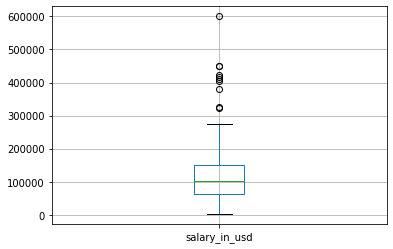

In [36]:
ds_data.boxplot(['salary_in_usd'])

Среднее значение зарплаты в долларах - 112297. Это достаточно много, чтобы быть зарплатой за 1 месяц. Скорее всего, это годовая зарплата. 
Убедимся в этом.
На сайте kaggle.com в источнике с данными [Data Science Job Salaries](https://) приведена ссылка на источник сбора данных - https://ai-jobs.net/salaries/form/.
При переходе по ссылке открывается форма сбора данных по зарплатам. В поле зарплаты указано, что это должна быть годовая зарплата до вычета налогов и прочих сборов. 

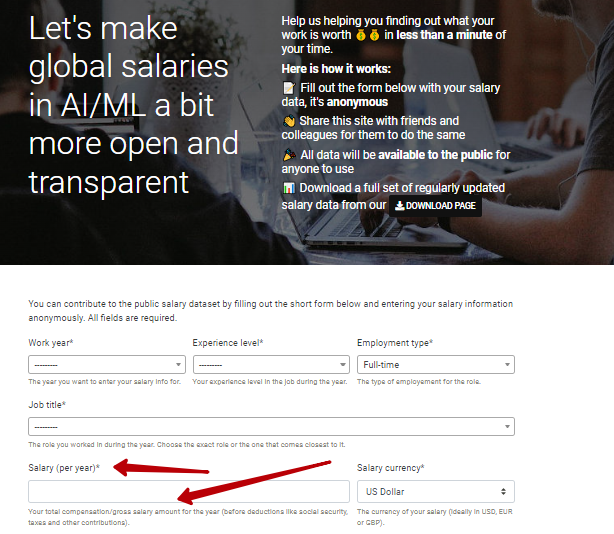

Следовательно, для удобства анализа переведем годовую зарплату в зарплату одного месяца:

In [37]:
ds_data['month_salary_in_usd'] = ds_data['salary_in_usd'] / 12

In [38]:
ds_data['month_salary_in_usd'].describe()

count     607.00
mean     9358.16
std      5913.10
min       238.25
25%      5227.17
50%      8464.17
75%     12500.00
max     50000.00
Name: month_salary_in_usd, dtype: float64

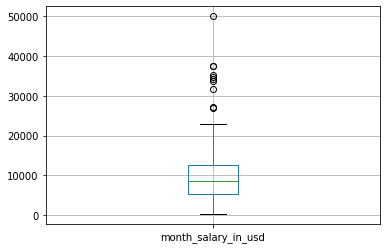

In [39]:
ds_data.boxplot(['month_salary_in_usd'])

Среднее значение зарплаты за месяц по всем специальностям - 9358 долларов США. 
Минимальное значение - 238 долларов США.
Максимальное значение - 50000 долларов США. 
В разделе исследовательского анализа посмотрим подробнее максимальные, минимальные и средние значения для каждой специальности и грейда. 

## Исследовательский анализ данных

### 1. Сколько всего должностей каждой специализации

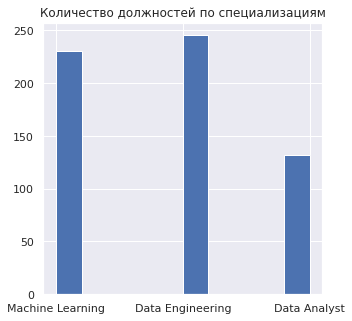

In [78]:
ds_data['job_title_update'].hist(figsize = (5,5))
plt.title('Количество должностей по специализациям')
plt.show()

График показывает распределение количества должностей по специализациям:
- Machine Learning - 230
- Data Engineering - 245
- Data Analyst - 132

Инженеров по данным и специалистов по машинному обучению в датасете больше, чем аналитиков. 

###  2. Сколько грейдов каждого вида

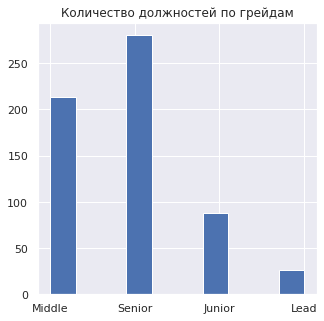

In [79]:
ds_data['experience_level_updated'].hist(figsize = (5,5))
plt.title('Количество должностей по грейдам')
plt.show()

График показывает количество сотрудников по каждому грейду:
- Junior - 88
- Middle - 213
- Senior - 280
- Lead - 26

Количество сотрудников уровня Senior в датасете больше, чем количество сотрудников других грейдов. 

###  3. Сколько контрактов каждого типа (фриланс/ контракт / удаленная работа)

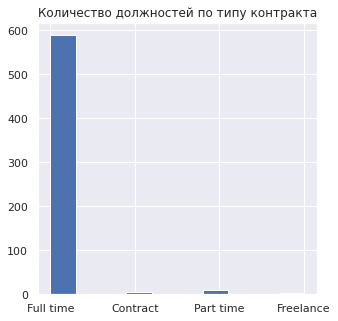

In [82]:
ds_data['employment_type_update'].hist(figsize = (5,5))
plt.title('Количество должностей по типу трудоустройства')
plt.show()

График показывает следующее количество контрактов:
- Full time - 588
- Part time - 10
- Contract - 5
- Freelance - 4

Больше всего сотрудников трудоустроены фулл-тайм. 


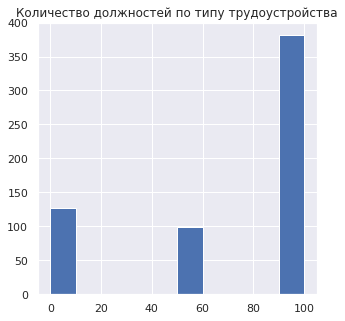

In [84]:
ds_data['remote_ratio'].hist(figsize = (5,5))
plt.title('Количество должностей по типу количеству удаленной работы')
plt.show()

Количество удаленки:
- 100% удаленной работы - 381
- 50% удаленной работы - 99
- 0% удаленной работы - 127

Преобладают позиции с полной удаленкой. 

### 4. Топ 10 стран с самым большим количеством сотрудников (страна компании и страна сотрудника)

Рассмотрим отдельно страны по количеству сотрудников, в которых находятся головные офисы компаний, и страны, из которых работает больше всего сотрудников (в том числе полностью удаленных сотрудников). 

В компаниях каких стран работает больше всего сотрудников без учета разделения на офисную/ удаленную работу:

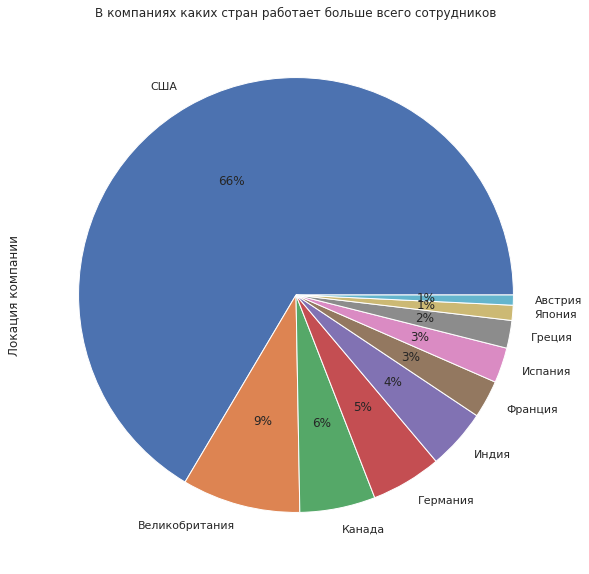

In [106]:
(ds_data['company_location_update'].value_counts()
  .sort_values(ascending = False).head(10)
  .plot(y='count', kind = 'pie', figsize = (10,10), autopct='%1.0f%%'))
plt.title('В компаниях каких стран работает больше всего сотрудников')
plt.ylabel('Локация компании')
plt.show()

Получили следующие страны:
- США - 66%
- Великобритания - 9%
- Канада - 6%
- Германия - 5%
- Индия - 4%
- Франция - 3%
- Испания - 3%
- Греция - 2%
- Япония - 1%
- Австрия - 1%


Больше всего сотрудников работает в компаниях, расположенных в США. 

Из каких стран сотрудников больше всего без учета разделения на офисную и удаленную работу:

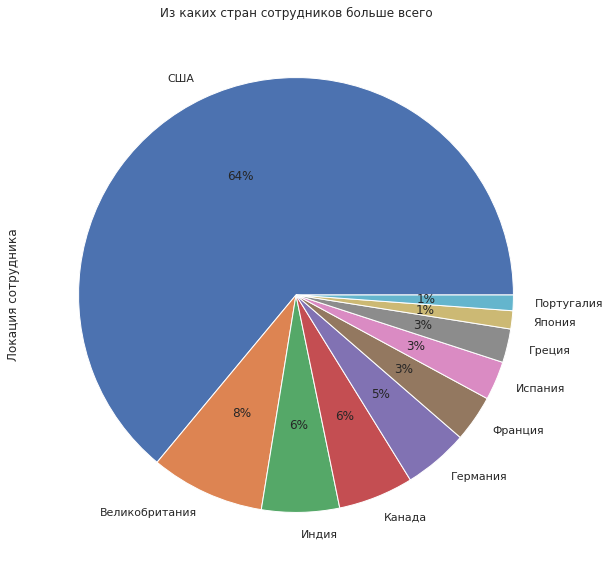

In [107]:
(ds_data['employee_residence_update'].value_counts()
  .sort_values(ascending = False).head(10)
  .plot(y='count', kind = 'pie', figsize = (10,10), autopct='%1.0f%%'))
plt.title('Из каких стран сотрудников больше всего')
plt.ylabel('Локация сотрудника')
plt.show()

- США - 64%
- Великобритания - 8%
- Индия - 6%
- Канада - 6%
- Германия - 5%
- Франция - 3%
- Испания - 3%
- Греция - 3%
- Япония - 1%
- Португалия - 1%

Больше всего сотрудников работает из США без учета страны нахождения компании. 

Из каких стран больше всего работает полностью удаленных сотрудников:

In [47]:
ds_data_remote = ds_data.query('remote_ratio == 100')

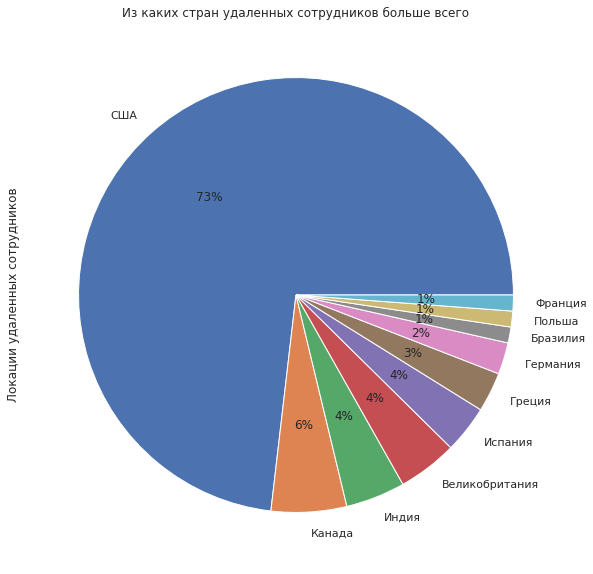

In [108]:
(ds_data_remote['employee_residence_update']
  .value_counts()
  .sort_values(ascending = False).head(10)
  .plot(y='count', kind = 'pie', figsize = (10,10), autopct='%1.0f%%'))
plt.title('Из каких стран удаленных сотрудников больше всего')
plt.ylabel('Локации удаленных сотрудников')
plt.show()

Это такие страны как:
- США - 73%
- Канада - 6%
- Индия - 4%
- Великобритания - 4%
- Испания - 4%
- Греция - 3%
- Германия - 2%
- Бразилия - 1%
- Польша - 1%
- Франция - 1%

Больше всего удаленных сотрудников работает в США. 

###   5. Топ 10 стран с самыми большими зарплатами (страна компании и страна сотрудника с учетом и без учета офисной/ полностью удаленной работы)

Для учета выбросов в данных посмотрим медианную, а не среднюю зарплату по странам в месяц, в которых расположены компании:

In [49]:
ds_data.groupby('company_location_update')['month_salary_in_usd'].median().sort_values(ascending = False).head(10)

company_location_update
Россия           13125.00
США              11250.00
Новая Зеландия   10416.67
ОАЭ               9583.33
Ирак              8333.33
Алжир             8333.33
Сингапур          7441.17
Австралия         7285.42
Бельгия           7141.58
Канада            6824.62
Name: month_salary_in_usd, dtype: float64

Страны с самыми большими зарплатами, в которых находятся головные офисы компаний:
- Россия - 13 125
- США - 11 250
- Новая Зеландия - 10 416
- ОАЭ - 9 583
- Ирак - 8 333
- Алжир - 8 333 
- Сингапур - 7 441$
- Австралия - 7 285
- Бельгия - 7 141 
- Канада - 6 842 

Самые большие зарплаты показали Россия, США и Новая Зеландия. 

Посмотрим медианную зарплату по странам, в которых находятся сотрудники, без учета удаленной работы:

In [50]:
ds_data.groupby('employee_residence_update')['month_salary_in_usd'].median().sort_values(ascending = False).head(10)

employee_residence_update
Малайзия         16666.67
Пуэрто-Рико      13333.33
США              11539.58
Новая Зеландия   10416.67
Швейцария        10195.50
ОАЭ               9583.33
Сингапур          8681.38
Джерси            8333.33
Алжир             8333.33
Ирак              8333.33
Name: month_salary_in_usd, dtype: float64

Это такие страны как:
- Малайзия - 16 666
- Пуэрто-Рико - 13 333
- США - 11 539
- Новая Зеландия - 10 416
- Швейцария - 10 195
- ОАЭ - 9 583
- Сингапур - 8 681
- Джерси - 8 333
- Алжир - 8 333
- Ирак - 8 333

Самые большие зарплаты у сотрудников из Малайзии, Пуэрто-Рико и США. 

Посмотрим медианную зарплату по странам, в которых находятся сотрудники, с учетом удаленной работы:

In [51]:
ds_data_remote.groupby('employee_residence_update')['month_salary_in_usd'].median().sort_values(ascending = False).head(10)

employee_residence_update
Малайзия    16666.67
Италия      12805.58
США         11666.67
Сингапур     9921.58
Австралия    9892.71
Словения     8569.92
ОАЭ          7708.33
Бельгия      7387.83
Германия     7289.29
Болгария     6666.67
Name: month_salary_in_usd, dtype: float64

Страны сотрудников с учетом удаленной работы:
- Малайзия - 16 666
- Италия - 12 805
- США - 11 666
- Сингапур - 9 921
- Австралия - 9 892
- Словения - 8 569
- ОАЭ - 7 708
- Бельгия - 7 387
- Германия - 7 289
- Болгария - 6 666

Самые высокие зарплаты имеют удаленные сотрудники из Малайзии, Италии и США. 

### 6. Распределение по специализациям и грейдам по каждому году

Количество сотрудников каждой специализации по годам:

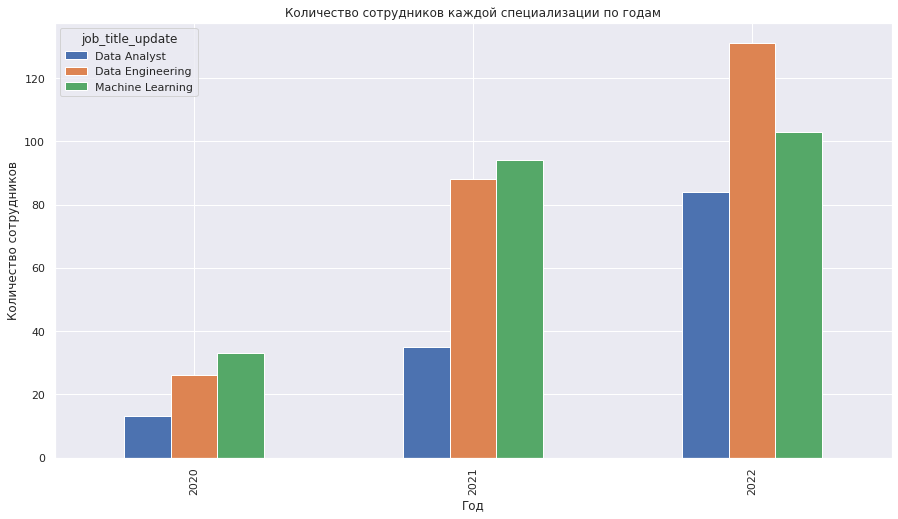

In [90]:
ds_data.pivot_table(index = 'work_year', columns = 'job_title_update', values = 'experience_level_updated', aggfunc = 'count').plot(kind='bar', figsize = (15,8), grid = True)
plt.title('Количество сотрудников каждой специализации по годам')
plt.xlabel('Год')
plt.ylabel('Количество сотрудников')
plt.show()

Количество сотрудников, принявших участие в исследовании, росло с 2020 по 2022, т.е. на всем периоде сбора данных. Также в 2022 году значительно выросло количество инженеров по данным - их стало больше, чем представителей специализаций машинного обучения и анализа данных. 

Количество сотрудников каждого грейда по годам:

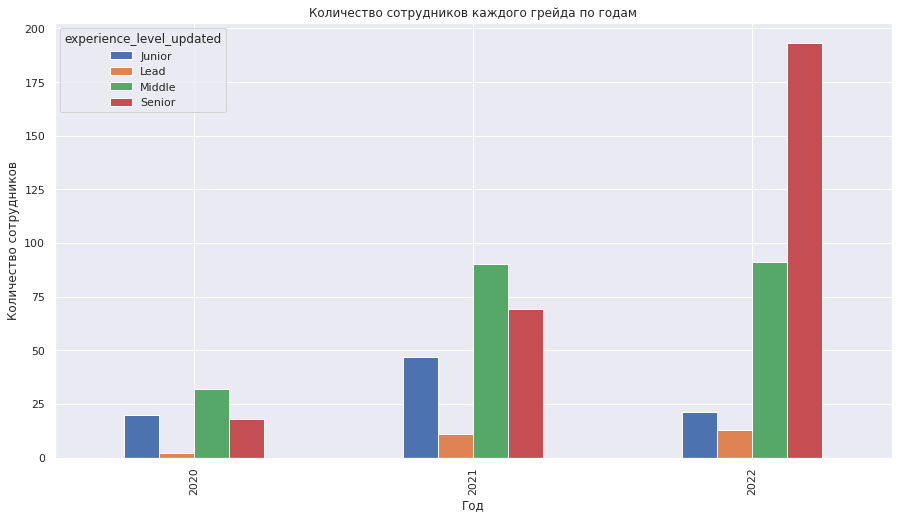

In [91]:
ds_data.pivot_table(index = 'work_year', columns = 'experience_level_updated', values = 'job_title', aggfunc = 'count').plot(kind='bar', figsize = (15,8), grid = True)
plt.title('Количество сотрудников каждого грейда по годам')
plt.xlabel('Год')
plt.ylabel('Количество сотрудников')
plt.show()

Из этого графика также видно, что с каждым годом росло количество участников исследования. В 2020 и 2021 годах преобладало количество миддлов. В 2022 значительно увеличилось число сеньоров. 

### 7. Распределение зарплат по каждому грейду и специализации

Посмотрим зарплаты по специализациям Data Analyst, Data Engineering Machine Learning в разрезе грейдов Junior, Middle, Senior, Lead: 

Джуны:

In [55]:
display(ds_data.query('(experience_level_updated == "Junior") and (job_title_update == "Data Analyst")')['month_salary_in_usd'].describe())
display(ds_data.query('(experience_level_updated == "Junior") and (job_title_update == "Data Engineering")')['month_salary_in_usd'].describe())
display(ds_data.query('(experience_level_updated == "Junior") and (job_title_update == "Machine Learning")')['month_salary_in_usd'].describe())

count     17.00
mean    4759.32
std     2647.48
min      506.00
25%     4166.67
50%     4925.17
75%     6666.67
max     8333.33
Name: month_salary_in_usd, dtype: float64

count      32.00
mean     5270.41
std      4362.74
min       490.17
25%      1829.02
50%      4462.21
75%      6687.50
max     20833.33
Name: month_salary_in_usd, dtype: float64

count      39.00
mean     5192.04
std      3574.38
min       333.33
25%      2567.75
50%      4366.33
75%      7500.00
max     18750.00
Name: month_salary_in_usd, dtype: float64

Джуны специализации инженеров по данным получают в среднем больше специалистов по машинному обучению и аналитиков данных - 5 270. Также у инженеров по данным грейда джун больше разброс значений зарплат - 4 362, и больше максимальная зарплата - 20 833. 
Вопрос для отдельного исследования - может ли действительно джун получать 20 833 доллара в месяц, или же присутствуют неточности в данных при их сборе. 

Миддлы:

In [56]:
display(ds_data.query('(experience_level_updated == "Middle") and (job_title_update == "Data Analyst")')['month_salary_in_usd'].describe())
display(ds_data.query('(experience_level_updated == "Middle") and (job_title_update == "Data Engineering")')['month_salary_in_usd'].describe())
display(ds_data.query('(experience_level_updated == "Middle") and (job_title_update == "Machine Learning")')['month_salary_in_usd'].describe())

count      42.00
mean     6405.84
std      5861.40
min       506.00
25%      3369.90
50%      5309.92
75%      7687.50
max     37500.00
Name: month_salary_in_usd, dtype: float64

count      85.00
mean     7028.08
std      3962.12
min       333.33
25%      4579.75
50%      6447.00
75%      8725.17
max     22500.00
Name: month_salary_in_usd, dtype: float64

count      86.00
mean     8087.18
std      6127.47
min       238.25
25%      3925.56
50%      6763.88
75%     10673.88
max     37500.00
Name: month_salary_in_usd, dtype: float64

Миддлы специализации машинного обучения в среднем получают больше, чем аналитики и инженеры по данным - 8 087. Также у них больше отклонение в значениях зарплат - 6 127.
При этом максимальная зарплата у аналитиков и специалистов машинного обучения одинаковая - 37 500. 

Сеньоры:

In [57]:
display(ds_data.query('(experience_level_updated == "Senior") and (job_title_update == "Data Analyst")')['month_salary_in_usd'].describe())
display(ds_data.query('(experience_level_updated == "Senior") and (job_title_update == "Data Engineering")')['month_salary_in_usd'].describe())
display(ds_data.query('(experience_level_updated == "Senior") and (job_title_update == "Machine Learning")')['month_salary_in_usd'].describe())

count      68.00
mean     9965.87
std      3995.85
min      5000.00
25%      7526.67
50%      9408.33
75%     11250.00
max     33750.00
Name: month_salary_in_usd, dtype: float64

count     119.00
mean    11588.98
std      4610.79
min      1575.58
25%      8366.67
50%     12083.33
75%     15080.83
max     23000.00
Name: month_salary_in_usd, dtype: float64

count      93.00
mean    12662.75
std      5300.07
min      1680.92
25%      9758.67
50%     12000.00
75%     15000.00
max     34333.33
Name: month_salary_in_usd, dtype: float64

Сеньоры специализации машинного обучения получают в среднем больше, чем инженеры данных и аналитики - 12 662. Также у них больше разброс в значениях зарплат - до 5 300. 
Также сеньоры специализации машинного обучения и аналитики имеют максимальную зарплату в представленной выборке. 

Лиды:

In [58]:
display(ds_data.query('(experience_level_updated == "Lead") and (job_title_update == "Data Analyst")')['month_salary_in_usd'].describe())
display(ds_data.query('(experience_level_updated == "Lead") and (job_title_update == "Data Engineering")')['month_salary_in_usd'].describe())
display(ds_data.query('(experience_level_updated == "Lead") and (job_title_update == "Machine Learning")')['month_salary_in_usd'].describe())

count       5.00
mean    14250.00
std      4826.86
min      9166.67
25%     10833.33
50%     12500.00
75%     19166.67
max     19583.33
Name: month_salary_in_usd, dtype: float64

count       9.00
mean    19352.04
std     12978.14
min      6652.75
25%     11250.00
50%     16666.67
75%     20166.67
max     50000.00
Name: month_salary_in_usd, dtype: float64

count      12.00
mean    15549.81
std      8685.43
min      5811.75
25%      9897.46
50%     13397.58
75%     19208.33
max     34666.67
Name: month_salary_in_usd, dtype: float64

Лиды специализации инженера данных имеют самую высокую среднюю зарплату - 19 352. Также они имеют самое значительное отклонение в зарплате - до 12 978, вероятно, такой разброс объясняется странами и компанией, в которой работает лид. Максимальную зарплату со значительным отрывом от других специализаций также имеют лиды инженеры по данным. 

### 8. Годовая динамика зарплат по каждому грейду и специализации

Джуны:

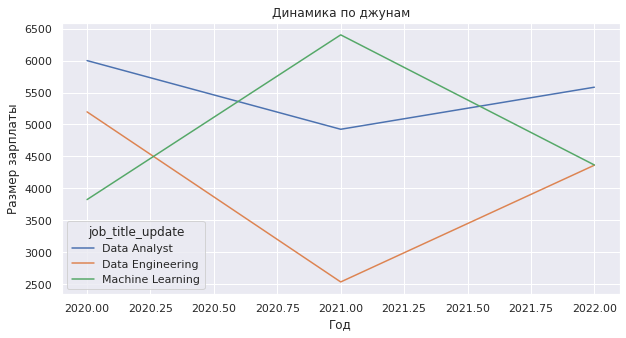

In [117]:
(
ds_data.query('experience_level_updated == "Junior"')
  .pivot_table(index = 'work_year', columns = 'job_title_update', values = 'month_salary_in_usd', aggfunc = 'median')
  .plot(kind='line', figsize = (10,5), grid = True)
)
plt.title('Динамика по джунам')
plt.xlabel('Год')
plt.ylabel('Размер зарплаты')
plt.show()

Из графика видно, что зарплаты заметно менялись от года к году. Выше других остаются зарплаты джунов аналитиков. 

Миддлы:

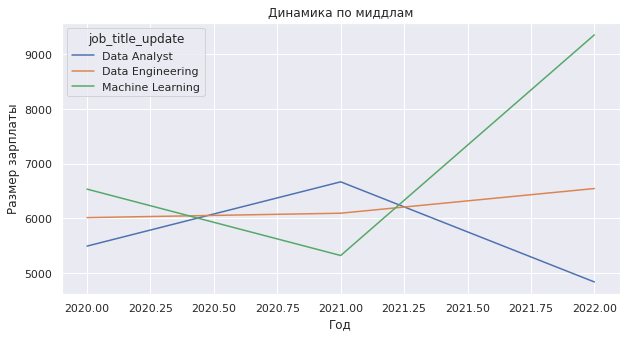

In [118]:
(
ds_data.query('experience_level_updated == "Middle"')
  .pivot_table(index = 'work_year', columns = 'job_title_update', values = 'month_salary_in_usd', aggfunc = 'median')
  .plot(kind='line', figsize = (10,5), grid = True)
)
plt.title('Динамика по миддлам')
plt.xlabel('Год')
plt.ylabel('Размер зарплаты')
plt.show()

Значительно выросли зарплаты у миддлов специализации машинного обучения. 

Сеньоры:

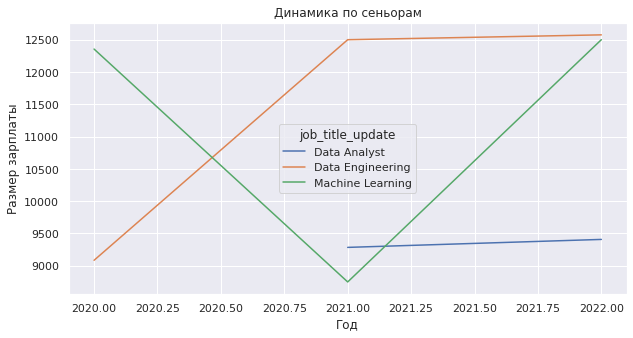

In [119]:
(
ds_data.query('experience_level_updated == "Senior"')
  .pivot_table(index = 'work_year', columns = 'job_title_update', values = 'month_salary_in_usd', aggfunc = 'median')
  .plot(kind='line', figsize = (10,5), grid = True)
)
plt.title('Динамика по сеньорам')
plt.xlabel('Год')
plt.ylabel('Размер зарплаты')
plt.show()

Значительно выросли зарплаты сеньоров инженеров данных, примерно на одном уровне со специалистами машинного обучения. 

Лиды:

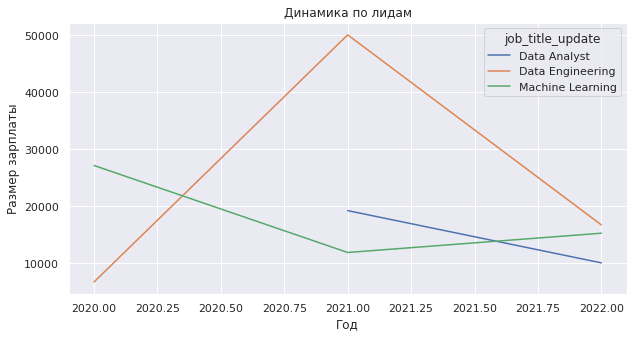

In [120]:
(
ds_data.query('experience_level_updated == "Lead"')
  .pivot_table(index = 'work_year', columns = 'job_title_update', values = 'month_salary_in_usd', aggfunc = 'median')
  .plot(kind='line', figsize = (10,5), grid = True)
)
plt.title('Динамика по лидам')
plt.xlabel('Год')
plt.ylabel('Размер зарплаты')
plt.show()

У лидов 2021 году росли зарплаты у инженеров данных. При этом к 2022 году небольшой рост показали только зарплаты специалистов машинного обучения, по остальным специализациям был спад. 

### 9. Разница в зарплатах по каждой специализации в зависимости от грейдов

Посмотрим среднее значение, а не медианное, чтобы выбросы в значениях не повлияли на сравнение зарплат. 

Data Analyst:

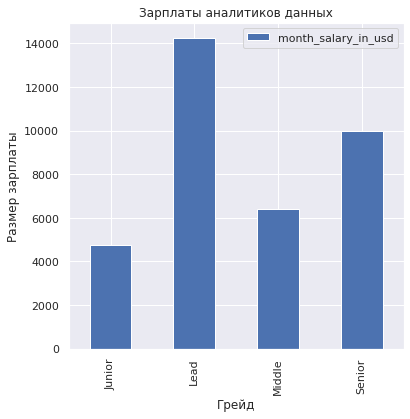

In [125]:
(
ds_data.query('job_title_update == "Data Analyst"')
  .pivot_table(index = 'experience_level_updated', values = 'month_salary_in_usd', aggfunc = 'mean')
  .plot(kind='bar', figsize = (6,6), grid = True)
)
plt.title('Зарплаты аналитиков данных')
plt.xlabel('Грейд')
plt.ylabel('Размер зарплаты')
plt.show()

Разница между зарплатами джунов и миддлов небольшая. Заметный рост зарплаты начинается при росте специалиста до сеньора и лида. 

Data Engineering:

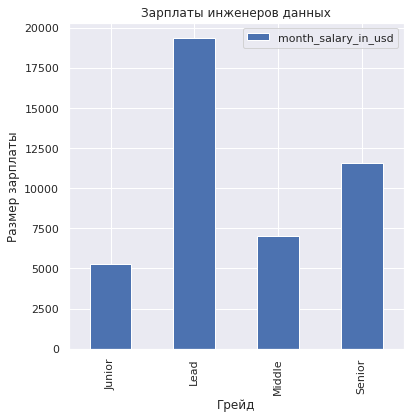

In [126]:
(
ds_data.query('job_title_update == "Data Engineering"')
  .pivot_table(index = 'experience_level_updated', values = 'month_salary_in_usd', aggfunc = 'mean')
  .plot(kind='bar', figsize = (6,6), grid = True)
)
plt.title('Зарплаты инженеров данных')
plt.xlabel('Грейд')
plt.ylabel('Размер зарплаты')
plt.show()

Для инженеров данных, также как и для аналитиков, разница между зарплатами джунов и миддлов небольшая. Заметный рост зарплаты начинается при росте специалиста до сеньора и лида. 

Machine Learning:

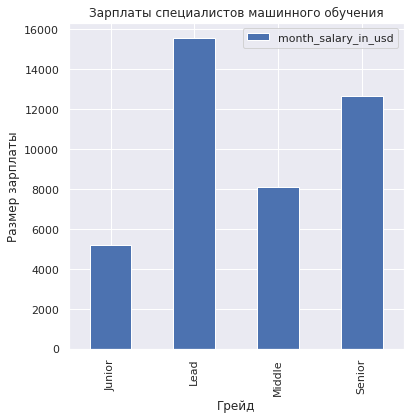

In [127]:
(
ds_data.query('job_title_update == "Machine Learning"')
  .pivot_table(index = 'experience_level_updated', values = 'month_salary_in_usd', aggfunc = 'mean')
  .plot(kind='bar', figsize = (6,6), grid = True)
)
plt.title('Зарплаты специалистов машинного обучения')
plt.xlabel('Грейд')
plt.ylabel('Размер зарплаты')
plt.show()

У специалистов машинного обучения заметный рост начинается при переходе с грейда джуна на миддла. Также далее идет заметный рост при переходе на сеньора и лида. 

### 10. Зависимость зарплаты от дополнительных параметров

Посмотрим также при помощи методов .corr() и .groupby() зависимость зарплаты от следующих параметров:
 - remote_ratio - общее количество удаленной работы
 - experience_level_updated - грейд
 - employment_type_update - тип трудоустройства
 - employee_residence_update - страна, из которой работает сотрудник
 - company_location_update - страна, в которой находится головной офис компании
 - company_size_update - размер компании



In [129]:
print('Зависимость размера зарплаты от количества удаленной работы:', ds_data['month_salary_in_usd'].corr(ds_data['remote_ratio']))
print('______________________________')
print('Зависимость размера зарплаты от грейда:', ds_data.groupby('experience_level_updated')['month_salary_in_usd'].mean().sort_values(ascending = True))
print('______________________________')
print('Зависимость размера зарплаты от типа трудоустройства:', ds_data.groupby('employment_type_update')['month_salary_in_usd'].mean().sort_values(ascending = True))
print('______________________________')
print('Зависимость размера зарплаты от страны, в которой работает сотрудник:', ds_data.groupby('employee_residence_update')['month_salary_in_usd'].mean().sort_values(ascending = False).head(10))
print('______________________________')
print('Зависимость размера зарплаты от страны, в которой находится компания:', ds_data.groupby('company_location_update')['month_salary_in_usd'].mean().sort_values(ascending = False).head(10))
print('______________________________')
print('Зависимость размера зарплаты от размера компании:', ds_data.groupby('company_size_update')['month_salary_in_usd'].mean().sort_values(ascending = True))

Зависимость размера зарплаты от количества удаленной работы: 0.1321223353942209
______________________________
Зависимость размера зарплаты от грейда: experience_level_updated
Junior    5136.94
Middle    7333.00
Senior   11551.44
Lead     16616.00
Name: month_salary_in_usd, dtype: float64
______________________________
Зависимость размера зарплаты от типа трудоустройства: employment_type_update
Part time    2755.88
Freelance    4000.00
Full time    9455.67
Contract    15381.25
Name: month_salary_in_usd, dtype: float64
______________________________
Зависимость размера зарплаты от страны, в которой работает сотрудник: employee_residence_update
Малайзия         16666.67
Пуэрто-Рико      13333.33
США              12432.84
Новая Зеландия   10416.67
Швейцария        10195.50
Австралия         9003.56
Россия            8812.50
Сингапур          8681.38
Япония            8628.14
Алжир             8333.33
Name: month_salary_in_usd, dtype: float64
______________________________
Зависимость разм

Размер зарплаты не зависит от количества удаленной работы. Но зависит от грейда - при росте по карьерной лестнице зарплата растет. 
Также более высокие зарплаты у специалистов на контракте и у специалистов, которые работают полный рабочий день. 
Есть зависимость размера зарплаты от страны, из которой работает специалист - максимальные зарплаты получают специалисты из Малайзии, Пуэрто-Рико, США и Новой Зеландии. 
Также есть зависимость размера зарплаты от страны, в которой находится компания - максмальные зарплаты получают специалисты, которые работают на компании из России, США, Новой Зеландии и Японии. 
Чем больше размер компании, тем выше в ней зарплаты. 

### 11. Тепловая карта портрета сотрудника с самой большой/ самой маленькой зарплатой 

In [67]:
data_for_heatmap = ds_data.pivot_table(
    index = ['company_size_update', 'employment_type_update'], columns = ['experience_level_updated', 'job_title_update'], values = 'month_salary_in_usd', aggfunc = 'mean'
)
data_for_heatmap

experience_level_updated                           Junior                   \
job_title_update                             Data Analyst Data Engineering   
company_size_update   employment_type_update                                 
50-250 сотрудников    Contract                        NaN              NaN   
                      Freelance                       NaN              NaN   
                      Full time                   5135.03          4406.32   
                      Part time                    862.83              NaN   
Более 250 сотрудников Contract                    8333.33              NaN   
                      Freelance                       NaN              NaN   
                      Full time                   6710.46          5325.52   
                      Part time                       NaN              NaN   
до 50 сотрудников     Contract                        NaN              NaN   
                      Freelance                       NaN              NaN   
                      Full time                   3199.22          7350.93   
                      Part time                       NaN          1857.29   

experience_level_updated                                              Lead  \
job_title_update                             Machine Learning Data Analyst   
company_size_update   employment_type_update                                 
50-250 сотрудников    Contract                        2656.25          NaN   
                      Freelance                           NaN          NaN   
                      Full time                       3822.34     10000.00   
                      Part time                       4666.67          NaN   
Более 250 сотрудников Contract                            NaN          NaN   
                      Freelance                           NaN          NaN   
                      Full time                       6252.49     17083.33   
                      Part time                           NaN          NaN   
до 50 сотрудников     Contract                            NaN          NaN   
                      Freelance                           NaN          NaN   
                      Full time                       5978.01          NaN   
                      Part time                       1402.88          NaN   

experience_level_updated                                       \
job_title_update                             Data Engineering   
company_size_update   employment_type_update                    
50-250 сотрудников    Contract                            NaN   
                      Freelance                           NaN   
                      Full time                      17944.44   
                      Part time                           NaN   
Более 250 сотрудников Contract                            NaN   
                      Freelance                           NaN   
                      Full time                      28326.38   
                      Part time                           NaN   
до 50 сотрудников     Contract                            NaN   
                      Freelance                           NaN   
                      Full time                       9848.92   
                      Part time                           NaN   

experience_level_updated                                            Middle  \
job_title_update                             Machine Learning Data Analyst   
company_size_update   employment_type_update                                 
50-250 сотрудников    Contract                            NaN          NaN   
                      Freelance                           NaN          NaN   
                      Full time                      12643.77      6347.67   
                      Part time                           NaN          NaN   
Более 250 сотрудников Contract                            NaN          NaN   
                      Freelance                           

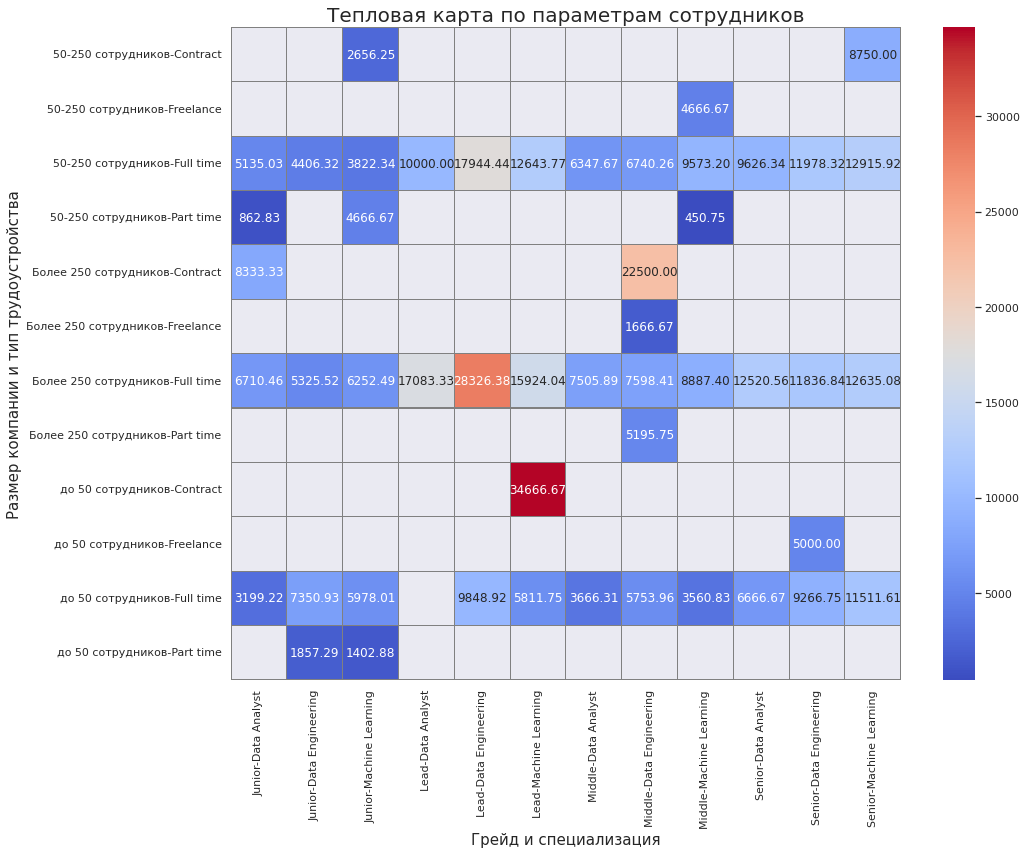

In [68]:
sns.set(rc = {'figure.figsize':(15,12)})
sns.heatmap(data_for_heatmap, annot = True, fmt='.2f', cmap= 'coolwarm', linewidths=0.1, linecolor='grey') 
plt.title('Тепловая карта по параметрам сотрудников', fontsize = 20) 
plt.xlabel('Грейд и специализация', fontsize = 15) 
plt.ylabel('Размер компании и тип трудоустройства', fontsize = 15) 
plt.show()

Максимальную зарплату получают лиды специализаций инженер данных и машинное обучение, которые работают по контракту либо фулл-тайм. 
Минимальную зарплату получают джуны всех специализаций и миддлы машинного обучения, которые работают на частичной занятости (парт тайм), что понятно, т.к. они работают меньше часов, чем при фулл-тайм работе. 

## Выводы

Основные параметры, которые влияют на размер зарплаты: 
- страна
- грейд
- специализация
- размер компании
- тип трудоустройства

Детализация по грейдам и специализациям:
- Джуны специализации инженеров по данным получают в среднем больше специалистов по машинному обучению и аналитиков данных - 5 270. Также у инженеров по данным грейда джун больше максимальная зарплата, чем у других специализаций - 20 833.
- Миддлы специализации машинного обучения в среднем получают больше, чем аналитики и инженеры по данным - 8 087. При этом максимальная зарплата у аналитиков и специалистов машинного обучения одинаковая - 37 500.
- Сеньоры специализации машинного обучения получают в среднем больше, чем инженеры данных и аналитики - 12 662. Также сеньоры специализации машинного обучения и аналитики имеют максимальную зарплату в представленной выборке.
- Лиды специализации инженера данных имеют самую высокую среднюю зарплату - 19 352. Максимальную зарплату со значительным отрывом от других специализаций также имеют лиды инженеры по данным.

Карьерные наблюдения по результатам исследования:
- Для инженеров данных, также как и для аналитиков, разница между зарплатами джунов и миддлов небольшая. Заметный рост зарплаты начинается при росте специалиста до сеньора и лида. У специалистов машинного обучения заметный рост начинается при переходе с грейда джуна на миддла. Также далее идет заметный рост при переходе на сеньора и лида.
- Размер зарплаты не зависит от доли удаленной работы. При этом более высокие зарплаты у специалистов на контракте и у специалистов, которые работают полный рабочий день. Чем больше размер компании, тем выше в ней зарплаты.
- Максимальную зарплату получают лиды специализаций инженер данных и машинное обучение, которые работают по контракту либо фулл-тайм. Минимальную зарплату получают джуны всех специализаций и миддлы машинного обучения, которые работают на частичной занятости (парт тайм), что понятно, т.к. они работают меньше часов, чем при фулл-тайм работе.